### Database Connection

In [10]:
#Importing all required libraries for the project if it is not available install and then import it
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium

In [11]:
# Connecting with MYSQL database of crime_dataset 
conn = pymysql.connect(
        host='localhost',
        user='root',
        password="iamsoul@1991",
        db='project',
)

print(conn)


### Data Exploration


In [12]:
# Retriving data from Crime dataset using cursor method
cur = conn.cursor()
print(cur)
query_1 = "select * from crime_dataset"
print(query_1)
cur.execute(query_1)
all_data = cur.fetchall()
print(all_data)


select * from crime_dataset
((10304468, datetime.date(2020, 1, 8), datetime.date(2020, 1, 8), 'Southwest', 624, 'BATTERY - SIMPLE ASSAULT', 36, 'F', 'SINGLE FAMILY DWELLING', 'AO', '1100 W 39TH PL', 34.01, -118.3), (190101086, datetime.date(2020, 1, 2), datetime.date(2020, 1, 1), 'Central', 624, 'BATTERY - SIMPLE ASSAULT', 25, 'M', 'SIDEWALK', 'IC', '700 S HILL ST', 34.05, -118.25), (191501505, datetime.date(2020, 1, 1), datetime.date(2020, 1, 1), 'N Hollywood', 745, 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 76, 'F', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)', 'IC', '5400 CORTEEN PL', 34.17, -118.4), (191921269, datetime.date(2020, 1, 1), datetime.date(2020, 1, 1), 'Mission', 740, 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 31, 'X', 'BEAUTY SUPPLY STORE', 'IC', '14400 TITUS ST', 34.22, -118.45), (200100502, datetime.date(2020, 1, 2), datetime.date(2020, 1, 2), 'Central', 442, 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 23, 'M', 'DEPARTMENT STORE', 'IC', '700 S FIGU

In [13]:
# Converting tuples data into Dataframe form like table using pandas
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", "use_inf_as_na")

mysql_queryry_df2 = pd.read_sql("select * from crime_dataset",conn)
mysql_queryry_df2.columns=["DR_NO","Date_Rptd","DATE_OCC","AREA_NAME","Crm_Cd","Crm_Cd_Desc","Vict_Age",
                           "Vict_Sex","Premis_Desc","Status","Location","LAT","LON"]
data=mysql_queryry_df2
data.info()
print(mysql_queryry_df2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        499 non-null    int64  
 1   Date_Rptd    499 non-null    object 
 2   DATE_OCC     499 non-null    object 
 3   AREA_NAME    499 non-null    object 
 4   Crm_Cd       499 non-null    int64  
 5   Crm_Cd_Desc  499 non-null    object 
 6   Vict_Age     499 non-null    int64  
 7   Vict_Sex     499 non-null    object 
 8   Premis_Desc  499 non-null    object 
 9   Status       499 non-null    object 
 10  Location     499 non-null    object 
 11  LAT          499 non-null    float64
 12  LON          499 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 50.8+ KB
         DR_NO   Date_Rptd    DATE_OCC    AREA_NAME  Crm_Cd  \
0     10304468  2020-01-08  2020-01-08    Southwest     624   
1    190101086  2020-01-02  2020-01-01      Central     624   
2    19150150

In [14]:
# Retrieving basic statistics on the dataset,
# such as the total number of records and unique values in specific columns.
mysql_query_df = pd.read_sql("select count(*) from crime_dataset",conn)
print(mysql_query_df)
mysql_query2_df = pd.read_sql("select count(Status) as Count,Status from crime_dataset group by Status;",conn)
print(mysql_query2_df)


   count(*)
0       499
   Count Status
0     24     AO
1    447     IC
2     27     AA
3      1     JO


##### Conclusion:Data can be retrieved after successful connection with database which is in MYSOL server.We can use Pandas module to read any sql query or using cursor method any required data from database can be fetched. 

### Temporal Analysis:

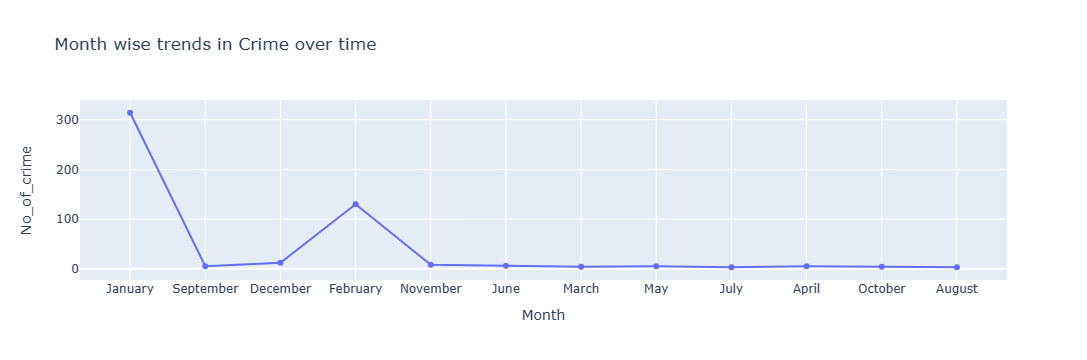

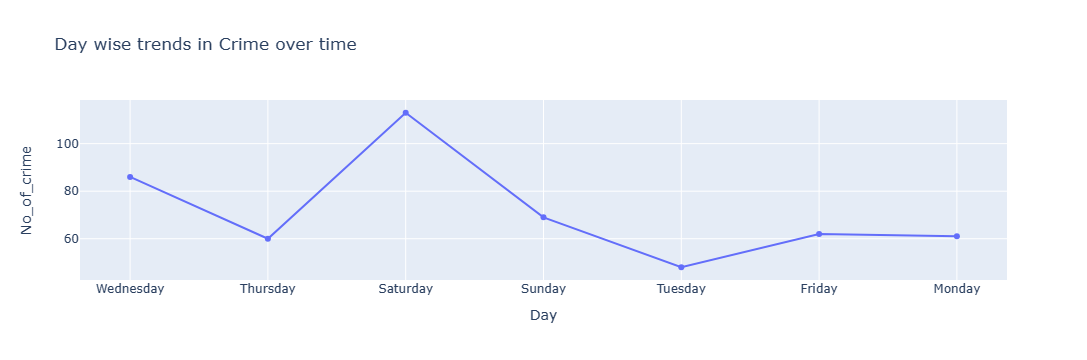

In [15]:
# Analyze the temporal aspects of the data showing trends in crime occurrence over time.

mysql_temporal_month = pd.read_sql("select count(*) as No_of_crime,monthname(DATE_OCC) as Month from crime_dataset group by monthname(DATE_OCC)",conn)
#print(mysql_temporal_month)

# Create a line graph using Plotly Express
mysql_temporal_day = pd.read_sql("select count(*) as No_of_crime,dayname(DATE_OCC) as Day from crime_dataset group by dayname(DATE_OCC)",conn)

fig1 = px.line(mysql_temporal_month, x='Month', y='No_of_crime', title='Month wise trends in Crime over time',markers=True)
fig2 = px.line(mysql_temporal_day, x='Day', y='No_of_crime', title='Day wise trends in Crime over time',markers=True)

# Show the graph
fig1.show()
fig2.show()

In [7]:
# Executing query:comparing date reported vs date when crime occur

cur = conn.cursor()
query_date='select count(*) from crime_dataset where Date_Rptd=DATE_OCC'
print(query_date)
cur.execute(query_date)
ans_count = cur.fetchall()
print(ans_count)

#Query to analyse no of crime reported delay
cur = conn.cursor()
query_delay_count='select count(*),day_delay from (select case when Date_Rptd=DATE_OCC then "Same day reported" else "Late reported" end as day_delay,Date_Rptd from crime_dataset) a group by day_delay'
print(query_delay_count)
cur.execute(query_delay_count)
ans_count3 = cur.fetchall()
print(ans_count3)

#select distinct (year(Date_Rptd)) from crime_dataset;
#select distinct (year(DATE_OCC)) from crime_dataset;


select count(*) from crime_dataset where Date_Rptd=DATE_OCC
((299,),)
select count(*),day_delay from (select case when Date_Rptd=DATE_OCC then "Same day reported" else "Late reported" end as day_delay,Date_Rptd from crime_dataset) a group by day_delay
((299, 'Same day reported'), (200, 'Late reported'))


#### Conclusion:
#### All crimes occured in the year 2020. Most of the crimes reported in the same year. Some of the crimes were reported in year 2021, 2022 too.
#### 299 crimes were reported on the day of the crime occurance and rest 200 crimes were reported later.
#### January is the month which has highest crime occurance. Total number of crimes occured in January are 314 and most of the crime occured on Saturday

### Spatial Analysis

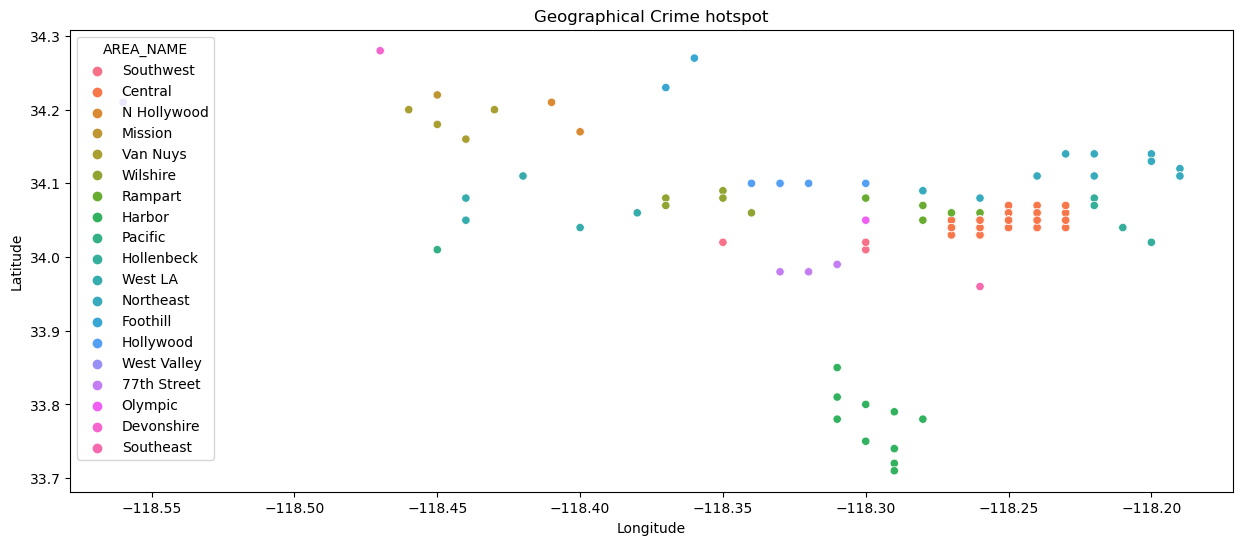

    crime_count    LAT     LON  AREA_NAME
0            94  34.05 -118.26    Central
1            75  34.05 -118.25    Central
2            47  34.04 -118.25    Central
3            43  34.06 -118.24    Central
4            39  34.05 -118.24    Central
..          ...    ...     ...        ...
77            1  34.07 -118.37   Wilshire
78            1  34.11 -118.24  Northeast
79            1  34.08 -118.35   Wilshire
80            1  34.10 -118.30  Hollywood
81            1  34.14 -118.23  Northeast

[82 rows x 4 columns]


In [8]:
# Utilize the geographical information (Latitude and Longitude) to perform spatial analysis
plt.figure(figsize=(15,6))

sns.scatterplot(x='LON',y='LAT',data=mysql_queryry_df2,
                hue=mysql_queryry_df2['AREA_NAME'])
#plt.scatter(mysql_queryry_df2['LON'],mysql_queryry_df2['LAT'],marker='H',color='Red',s=20,facecolor="Green",edgecolor="Blue",hue=mysql_queryry_df2['Location'])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Crime hotspot")
plt.show()

location_query=pd.read_sql('select count(*) as crime_count,LAT,LON,AREA_NAME from crime_dataset where LAT=LAT and LON=LON group by LAT,LON,AREA_NAME order by crime_count desc',conn)
print(location_query)


In [9]:
#Spatial Analysis:Visualize crime hotspots on a map
data=mysql_queryry_df2

m = folium.Map(location=(34.01,-118.3), tiles="OpenStreetMap", zoom_start=2)

for i in range(0,len(data)):
     folium.Marker(
        location=[data.iloc[i]['LAT'], data.iloc[i]['LON']]).add_to(m)
m

#### Conclusion: From geographical information ,the highest crime were occured in Central Area

### Victim Demographics

Text(0.5, 1.0, 'Distribution based upon Victim sex')

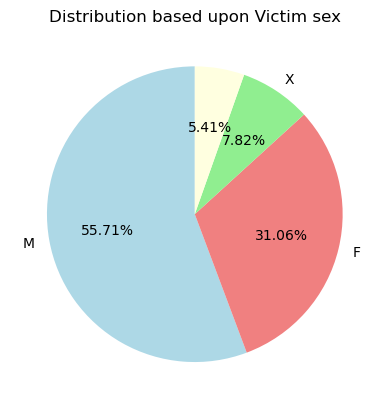

In [9]:
# Distribution of crime rate based upon victim gender
victim_query=pd.read_sql("select count(*)as count ,Vict_Sex from crime_dataset group by Vict_Sex order by count desc",conn)
plt.pie(victim_query["count"], labels=victim_query["Vict_Sex"], autopct='%1.2f%%', startangle=90,
        colors=['lightblue', 'lightcoral', 'lightgreen', 'lightyellow'])
plt.title("Distribution based upon Victim sex")


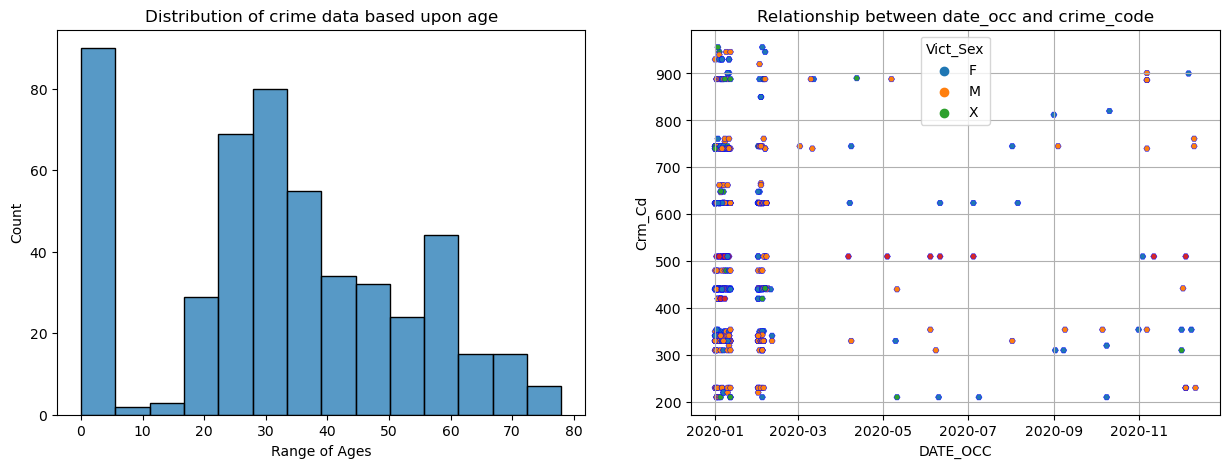

In [30]:
import seaborn as sns
#Victim Demographics
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
victim_query=pd.read_sql("select count(*)as count ,Vict_Sex from crime_dataset group by Vict_Sex order by count desc",conn)
#plot 1

#Victim Demographics:
sns.histplot(mysql_queryry_df2["Vict_Age"],ax=axes[0])
axes[0].set_title("Distribution of crime data based upon age")
axes[0].set_xlabel("Range of Ages")

#plot2
sns.scatterplot(x='DATE_OCC',y='Crm_Cd',data=mysql_queryry_df2,marker='H',color='Red',s=20,facecolor="Green",
                edgecolor="Blue",hue=mysql_queryry_df2["Vict_Sex"],ax=axes[1])
axes[1].set_xlabel("DATE_OCC")
axes[1].set_ylabel("Crm_Cd")
axes[1].set_title("Relationship between date_occ and crime_code")

#axes[1].set_title("Crime rate based upon gender")

#plt.ylabel("Frequencies")
plt.grid()
plt.show()

In [16]:
age_query = pd.read_sql("select count(*) as count ,Vict_Age from crime_dataset group by Vict_Age order by count desc",conn)
print(age_query)


    count  Vict_Age
0      90         0
1      19        26
2      17        35
3      16        28
4      15        23
..    ...       ...
61      1         8
62      1         9
63      1        17
64      1        70
65      1        78

[66 rows x 2 columns]


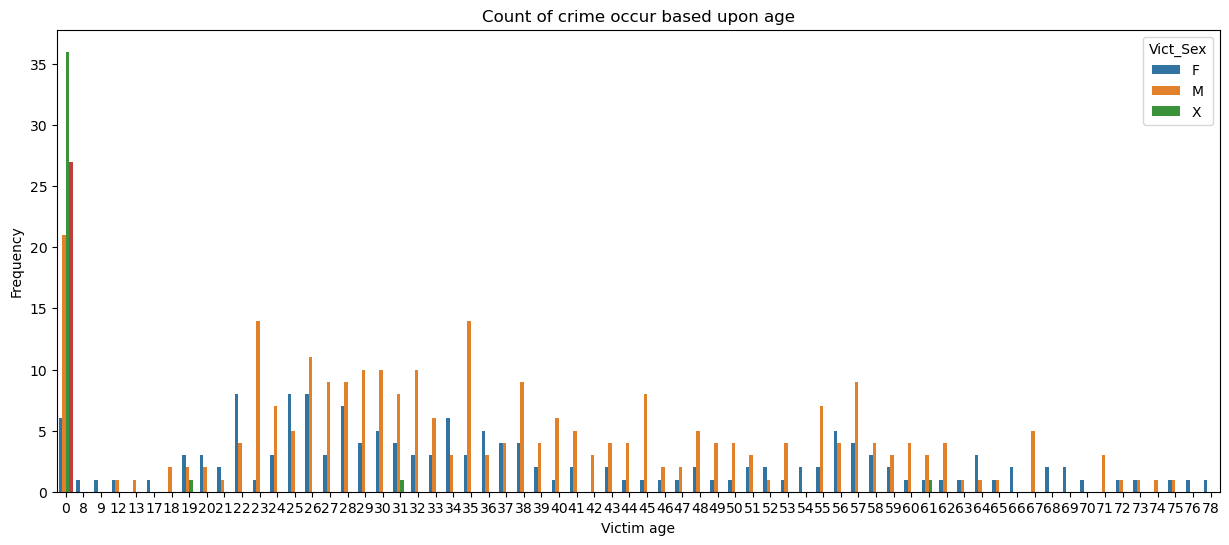

In [13]:
#Victim demographics:Count of crime occur based upon victim age
plt.figure(figsize=(15,6))
sns.countplot(x="Vict_Age", data=data,hue="Vict_Sex") # x axis is am column.
plt.title("Count of crime occur based upon age")
plt.xlabel("Victim age")
plt.ylabel("Frequency")
plt.show()

#### Conclusion: Young and early age adults were became victims in most of the crimes. Out of all victims, Male victims count is highest.

### Crime Code Analysis

In [18]:
#Identifying the distinct crime codes and their descriptions.
mysql_query1_df = pd.read_sql("select distinct crm_cd,Crm_Cd_Desc from crime_dataset",conn)
print(mysql_query1_df)


    crm_cd                                        Crm_Cd_Desc
0      624                           BATTERY - SIMPLE ASSAULT
1      745           VANDALISM - MISDEAMEANOR ($399 OR UNDER)
2      740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
3      442           SHOPLIFTING - PETTY THEFT ($950 & UNDER)
4      946                          OTHER MISCELLANEOUS CRIME
5      341  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...
6      330                              BURGLARY FROM VEHICLE
7      930             CRIMINAL THREATS - NO WEAPON DISPLAYED
8      648                                              ARSON
9      354                                  THEFT OF IDENTITY
10     230     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
11     761                                    BRANDISH WEAPON
12     350                                      THEFT, PERSON
13     310                                           BURGLARY
14     480                                      BIKE - STOLEN
15     6

     Crm_Cd  Count   Date_Rptd
0       624      9  2020-01-11
1       330      8  2020-01-12
2       624      7  2020-01-02
3       330      7  2020-01-04
4       330      7  2020-01-06
..      ...    ...         ...
275     440      1  2020-02-11
276     440      1  2020-02-08
277     624      1  2020-02-06
278     888      1  2020-02-07
279     745      1  2020-02-07

[280 rows x 3 columns]


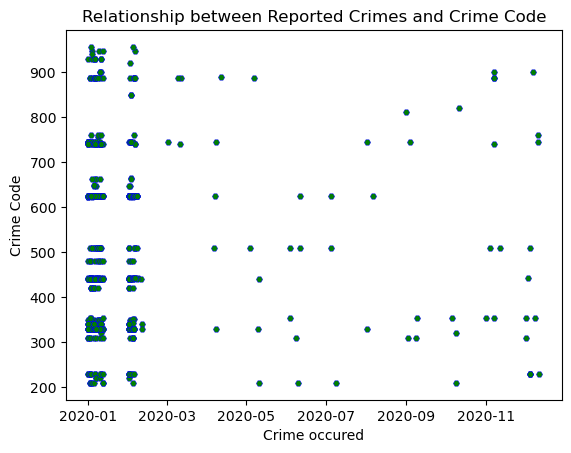

In [20]:
# Distribution of reported crimes based on Crime Code
# #scatter chart
sns.scatterplot(x='DATE_OCC',y='Crm_Cd',data=mysql_queryry_df2,marker='H',color='Red',s=20,facecolor="Green",edgecolor="Blue")
#hue=mysql_queryry_df2["Vict_Sex]
plt.xlabel("Crime occured")
plt.ylabel("Crime Code")
plt.title("Relationship between Reported Crimes and Crime Code")
#
crime_code_query=pd.read_sql("select distinct Crm_Cd,count(*) as Count, Date_Rptd from crime_dataset group by  Crm_Cd,Date_Rptd order by Count desc",conn)
print(crime_code_query)


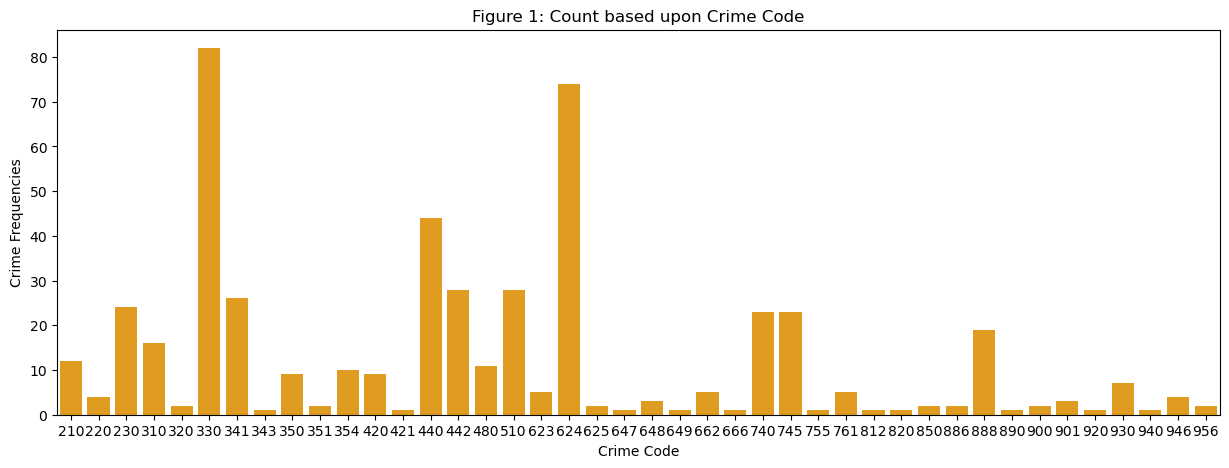

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x='Crm_Cd', data=data,color='Orange') # x axis is am column.
plt.title("Figure 1: Count based upon Crime Code")
plt.xlabel("Crime Code")
plt.ylabel("Crime Frequencies")
plt.show()#Analysis based on crime code :330 code BURGLARY FROM VEHICLE has highest crime total 82

### Conclusion: The highest reported crime code is 330 code which is 'BURGLARY FROM VEHICLE' crime.

### Location Analysis:

In [19]:
premise=pd.read_sql("select distinct Premis_Desc,count(*) as count from crime_dataset group by Premis_Desc order by count ",conn)
print(premise)

                                     Premis_Desc  count
0                                      MINI-MART      1
1             ABANDONED BUILDING ABANDONED HOUSE      1
2                         OFFICE BUILDING/OFFICE      1
3                            BEAUTY SUPPLY STORE      1
4                                     LAUNDROMAT      1
..                                           ...    ...
62                        SINGLE FAMILY DWELLING     25
63  MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     45
64                                   PARKING LOT     46
65                                      SIDEWALK     62
66                                        STREET    105

[67 rows x 2 columns]


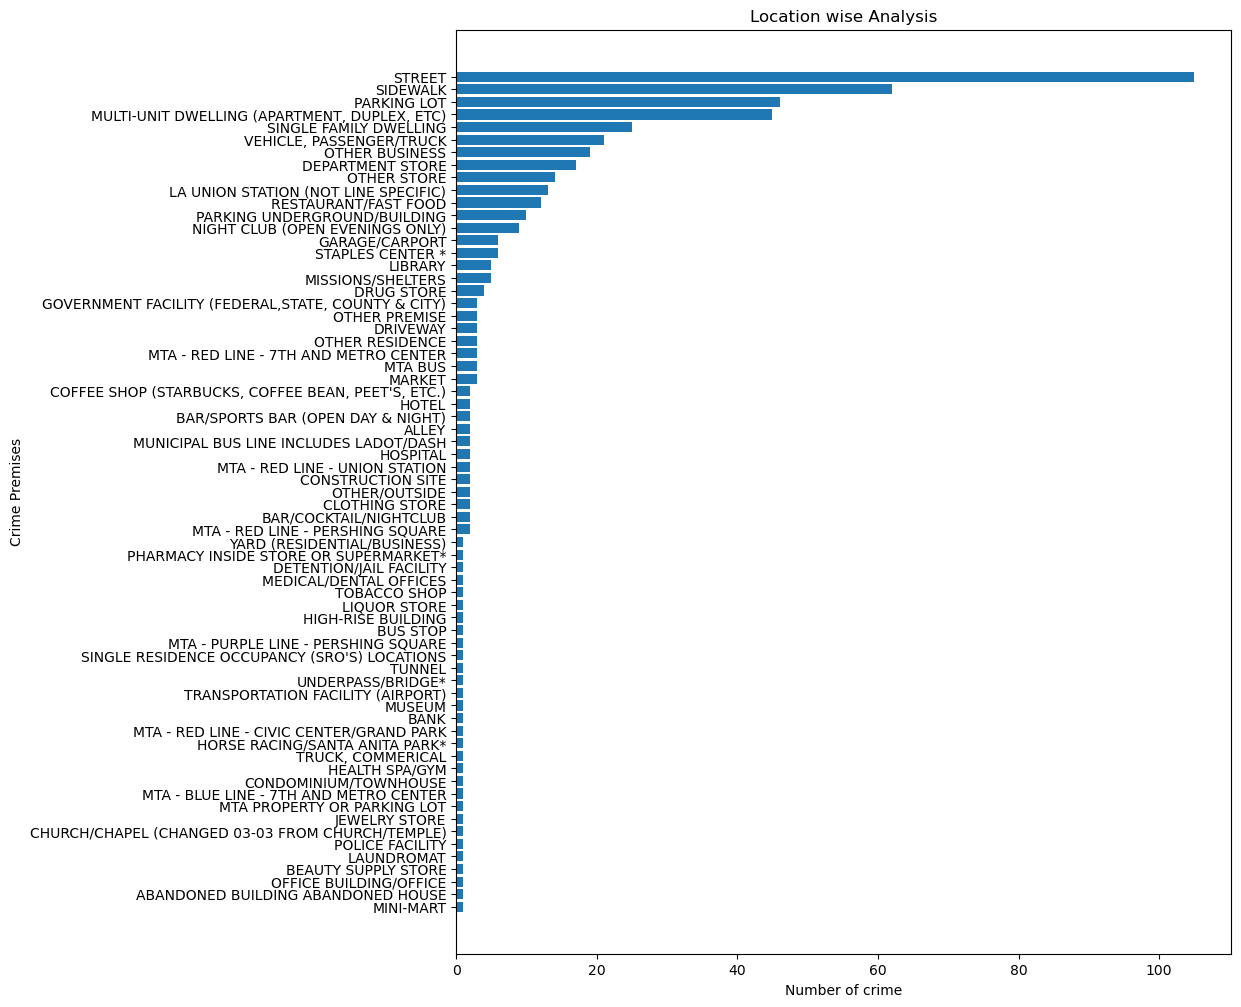

In [18]:
plt.figure(figsize=(10,12))
plt.barh(premise["Premis_Desc"],premise["count"])

plt.xlabel("Number of crime")
plt.ylabel("Crime Premises")
plt.title("Location wise Analysis")
plt.show()

In [17]:
query_location=pd.read_sql("select count(*) as count ,Location from crime_dataset group by Location order by count desc",conn)
print(query_location)


     count            Location
0       14    800 N ALAMEDA ST
1       11        700 W 7TH ST
2        6                 6TH
3        6        300 E 5TH ST
4        6  1100 S FIGUEROA ST
..     ...                 ...
360      1      1400 W 37TH DR
361      1   2400 ELLENDALE PL
362      1             39TH PL
363      1    2500 W VERNON AV
364      1  2600 S FIGUEROA ST

[365 rows x 2 columns]


### Conclusion: Based upon the location,area and premises, the highest crime were reported in street premises. Maximum number of crime were taken place at 800 N ALAMEDA ST.
